<a href="https://colab.research.google.com/github/ramseshu1/assignments_guvi/blob/main/Chennai_Home_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CHENNAI HOUSE PRICE PREDICTION**
**Find the probable range of house prices for Areas like Karapakkam, Adyar, Chrompet,etc**

Proceed to the end to select Area, and property details!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

dataset=pd.read_csv('House Price.csv')

# **Cleaning the Data**

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.info()

The rows containing the few missing data can be easily dropped since the dataset is large. But for practice, the data are filled. Understandably, the mode of the columns N_BEDROOM and N_BATHROOM are used, while mean is used for QS_OVERALL

In [ ]:
dataset['N_BEDROOM'] = dataset['N_BEDROOM'].fillna(dataset['N_BEDROOM'].mode()[0])

dataset['N_BATHROOM'] = dataset['N_BATHROOM'].fillna(dataset['N_BATHROOM'].mode()[0])

dataset['QS_OVERALL'] = dataset['QS_OVERALL'].fillna(dataset['QS_OVERALL'].mean())

The dataset contains lots of duplicate values. And each duplicate are found by inspecting the unique function across all columns. The data are then replaced with relevant data

In [ ]:
dataset["STREET"] = dataset["STREET"].replace(to_replace="Pavd", value ="Paved")
dataset["STREET"] = dataset["STREET"].replace(to_replace="NoAccess", value ="No Access")

dataset["SALE_COND"] = dataset["SALE_COND"].replace(to_replace="Partiall", value ="Partial")
dataset["SALE_COND"] = dataset["SALE_COND"].replace(to_replace="Ab Normal", value ="AbNormal")
dataset["SALE_COND"] = dataset["SALE_COND"].replace(to_replace="PartiaLl", value ="Partial")
dataset["SALE_COND"] = dataset["SALE_COND"].replace(to_replace="Adj Land", value ="AdjLand")


dataset["AREA"] = dataset["AREA"].replace(to_replace="KKNagar", value ="KK Nagar")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Karapakam", value ="Karapakkam")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Adyr", value ="Adyar")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Ana Nagar", value ="Anna Nagar")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Chormpet", value ="Chrompet")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Velchery", value ="Velachery")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Chrmpet", value ="Chrompet")
dataset["AREA"] = dataset["AREA"].replace(to_replace="TNagar", value ="T Nagar")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Chrompt", value ="Chrompet")
dataset["AREA"] = dataset["AREA"].replace(to_replace="Ann Nagar", value ="Anna Nagar")


dataset["PARK_FACIL"] = dataset["PARK_FACIL"].replace(to_replace="Noo", value ="No")

dataset["BUILDTYPE"] = dataset["BUILDTYPE"].replace(to_replace="Comercial", value ="Commercial")
dataset["BUILDTYPE"] = dataset["BUILDTYPE"].replace(to_replace="Other", value ="Others")

dataset["UTILITY_AVAIL"] = dataset["UTILITY_AVAIL"].replace(to_replace="AllPub", value ="All Pub")
dataset["UTILITY_AVAIL"] = dataset["UTILITY_AVAIL"].replace(to_replace='NoSeWa', value ='No Sewage')
dataset["UTILITY_AVAIL"] = dataset["UTILITY_AVAIL"].replace(to_replace='NoSewr ', value ='No Sewage')


Age of a house is an important factor in determining its sales price. Hence DATE_SALE and DATA_BUILD are used to find it.

In [ ]:
temp1 = dataset["DATE_SALE"].str.split("-", expand=True)
temp2 = dataset['DATE_BUILD'].str.split("-", expand=True)

temp1[2] = list(map(int, temp1[2]))
temp2[2] = list(map(int, temp2[2]))

dataset["AGE_OF_HOUSE"] = temp1[2]-temp2[2]

Since age of a house is determined, 'DATE_SALE','DATE_BUILD' can be dropped. We are also dropping 'PRT_ID' as it would not be of any use.

In [ ]:
dataset.drop(columns=['PRT_ID','DATE_SALE','DATE_BUILD'],inplace=True)

### **Finding the most important Columns and relationships**

Lets begin with the nominal and ordinal variables

Text(0.5, 1.0, 'Area Wise Sales')

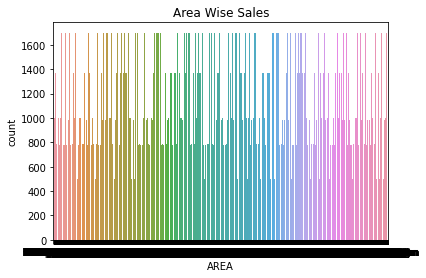

In [ ]:
sns.countplot(dataset=dataset,x='AREA',order=dataset['AREA'])
plt.title('Area Wise Sales')

Text(0.5, 1.0, 'Sales Condition')

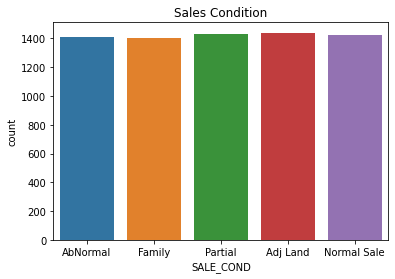

In [ ]:
sns.countplot(dataset=dataset,x='SALE_COND')
plt.title('Sales Condition')

Text(0.5, 1.0, 'Parking Facility')

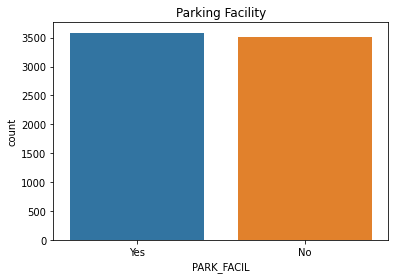

In [ ]:
sns.countplot(dataset=dataset,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

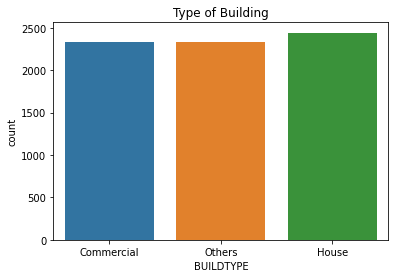

In [ ]:
sns.countplot(dataset=dataset,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Utility Available')

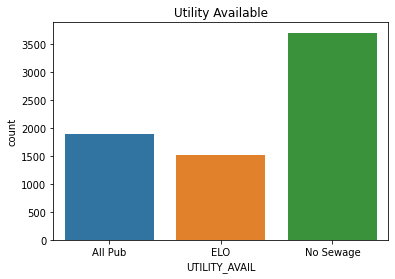

In [ ]:
sns.countplot(dataset=dataset,x='UTILITY_AVAIL')
plt.title('Utility Available')

Text(0.5, 1.0, 'Street Type')

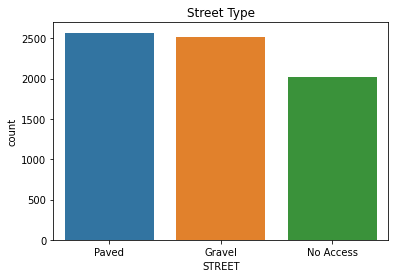

In [ ]:
sns.countplot(dataset=dataset,x='STREET')
plt.title('Street Type')

Text(0.5, 1.0, 'Zones of Chennai')

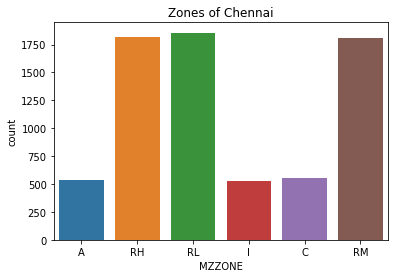

In [ ]:
sns.countplot(dataset=dataset,x='MZZONE')
plt.title('Zones of Chennai')

Numerical Variables

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Area in Squarefeet')

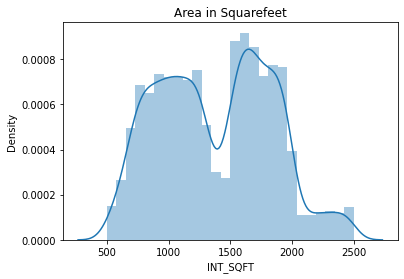

In [ ]:
sns.distplot(dataset['INT_SQFT'])
plt.title('Area in Squarefeet')

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

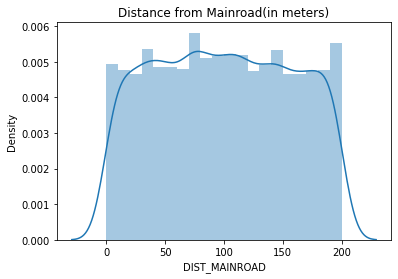

In [ ]:
sns.distplot(dataset['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Bedrooms')

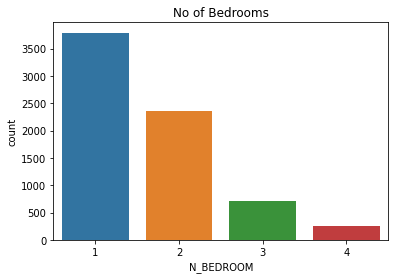

In [ ]:
sns.countplot(dataset['N_BEDROOM'])
plt.title('No of Bedrooms')

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of Bathrooms')

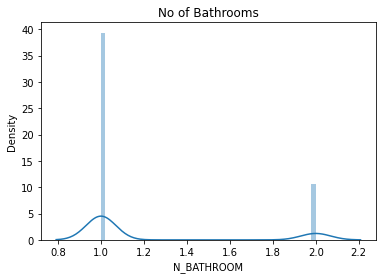

In [ ]:
sns.distplot(dataset['N_BATHROOM'])
plt.title('No of Bathrooms')

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'No of Rooms')

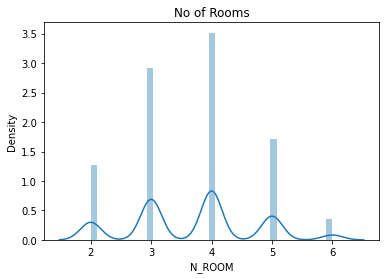

In [ ]:
sns.distplot(dataset['N_ROOM'])
plt.title('No of Rooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QS_ROOMS')

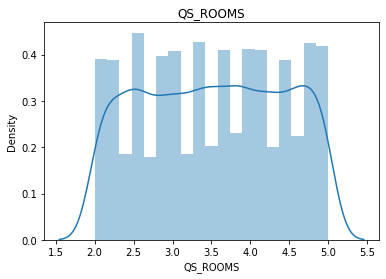

In [ ]:
sns.distplot(dataset['QS_ROOMS'])
plt.title('QS_ROOMS')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QS_BATHROOM')

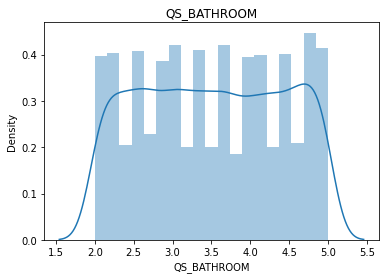

In [ ]:
sns.distplot(dataset['QS_BATHROOM'])
plt.title('QS_BATHROOM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QS_BATHROOM')

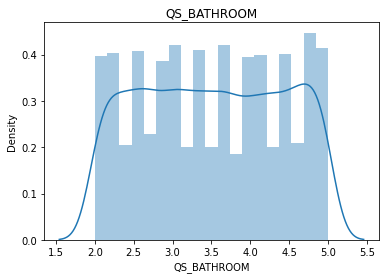

In [ ]:
sns.distplot(dataset['QS_BATHROOM'])
plt.title('QS_BATHROOM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QS_BEDROOM')

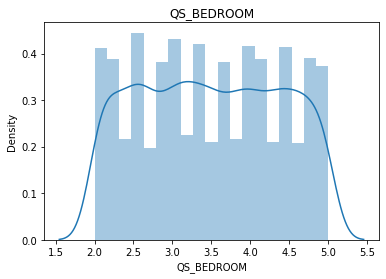

In [ ]:
sns.distplot(dataset['QS_BEDROOM'])
plt.title('QS_BEDROOM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QS_OVERALL')

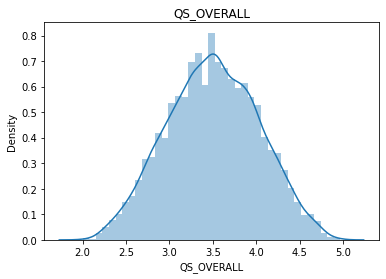

In [ ]:
sns.distplot(dataset['QS_OVERALL'])
plt.title('QS_OVERALL')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'COMMIS')

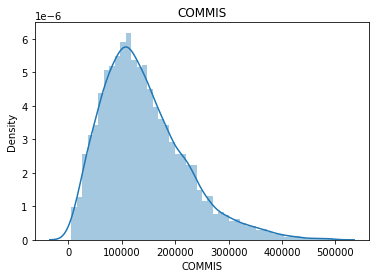

In [ ]:
sns.distplot(dataset['COMMIS'])
plt.title('COMMIS')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'REG_FEE')

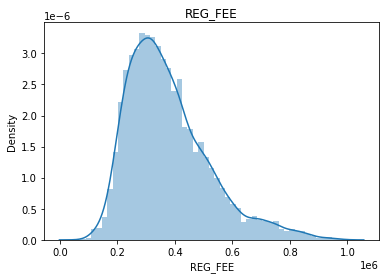

In [ ]:
sns.distplot(dataset['REG_FEE'])
plt.title('REG_FEE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the Area and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('N_ROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['N_ROOM']=temp.index
N_ROOM_values = temp.N_ROOM.unique()
px.bar(temp,x='N_ROOM',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the No of Rooms and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('INT_SQFT')['SALES_PRICE'].mean())
temp['INT_SQFT'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.histogram(temp,y='SALES_PRICE',x='INT_SQFT',nbins=25)

From the above plot it is evident that there is no linear relationship between the INT_SQFT and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('N_BEDROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['N_BEDROOM']=temp.index
N_BEDROOM_values = temp.N_BEDROOM.unique()
px.bar(temp,x='N_BEDROOM',y='SALES_PRICE',color='SALES_PRICE')


From the above plot it is evident that there is a linear relationship between the N_BEDROOM and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('N_BATHROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['N_BATHROOM']=temp.index
N_BATHROOM_values = temp.N_BATHROOM.unique()
px.bar(temp,x='N_BATHROOM',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the N_BATHROOM and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('SALE_COND')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['SALE_COND']=temp.index
SALE_COND_values = temp.SALE_COND.unique()
px.bar(temp,x='SALE_COND',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the SALE_COND and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('PARK_FACIL')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['PARK_FACIL']=temp.index
PARK_FACIL_values = temp.PARK_FACIL.unique()
px.bar(temp,x='PARK_FACIL',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the PARK_FACIL and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('BUILDTYPE')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['BUILDTYPE']=temp.index
BUILDTYPE_values = temp.BUILDTYPE.unique()
px.bar(temp,x='BUILDTYPE',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the BUILDTYPE and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['UTILITY_AVAIL']=temp.index
UTILITY_AVAIL_values = temp.UTILITY_AVAIL.unique()
px.bar(temp,x='UTILITY_AVAIL',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the UTILITY_AVAIL and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('STREET')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['STREET']=temp.index
STREET_values = temp.STREET.unique()
px.bar(temp,x='STREET',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the STREET and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('MZZONE')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['MZZONE']=temp.index
MZZONE_values = temp.MZZONE.unique()
px.bar(temp,x='MZZONE',y='SALES_PRICE',color='SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the MZZONE and Target.

In [ ]:
temp =pd.DataFrame(dataset.groupby('QS_ROOMS')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['QS_ROOMS']=temp.index
QS_ROOMS_values = temp.QS_ROOMS.unique()
px.bar(temp,x='QS_ROOMS',y='SALES_PRICE',color='SALES_PRICE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('QS_BATHROOM')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['QS_BATHROOM']=temp.index
QS_BATHROOM_values = temp.QS_BATHROOM.unique()
px.bar(temp,x='QS_BATHROOM',y='SALES_PRICE',color='SALES_PRICE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('QS_OVERALL')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['QS_OVERALL']=temp.index
QS_OVERALL_values = temp.QS_OVERALL.unique()
px.bar(temp,x='QS_OVERALL',y='SALES_PRICE',color='SALES_PRICE')

All 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', and 'QS_OVERALL' do not share a linear relationship with the target

The following graphs are not related to the project but trying to understand the dataset better

In [ ]:
temp =pd.DataFrame(dataset.groupby('REG_FEE')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['REG_FEE']=temp.index
REG_FEE_values = temp.REG_FEE.unique()
px.bar(temp,x='REG_FEE',y='SALES_PRICE',color='SALES_PRICE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('COMMIS')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['COMMIS']=temp.index
COMMIS_values = temp.COMMIS.unique()
px.bar(temp,x='COMMIS',y='SALES_PRICE',color='SALES_PRICE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('AREA')['QS_OVERALL'].mean())
temp = temp.sort_values(by='QS_OVERALL')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='QS_OVERALL',color='QS_OVERALL')

In [ ]:
temp =pd.DataFrame(dataset.groupby('AREA')['AGE_OF_HOUSE'].mean())
temp = temp.sort_values(by='AGE_OF_HOUSE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='AGE_OF_HOUSE',color='AGE_OF_HOUSE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('N_ROOM')['AGE_OF_HOUSE'].mean())
temp = temp.sort_values(by='AGE_OF_HOUSE')
temp['N_ROOM']=temp.index
N_ROOM_values = temp.N_ROOM.unique()
px.bar(temp,x='N_ROOM',y='AGE_OF_HOUSE',color='AGE_OF_HOUSE')

In [ ]:
temp =pd.DataFrame(dataset.groupby('QS_BATHROOM')['AGE_OF_HOUSE'].mean())
temp = temp.sort_values(by='AGE_OF_HOUSE')
temp['QS_BATHROOM']=temp.index
QS_BATHROOM_values = temp.QS_BATHROOM.unique()
px.bar(temp,x='QS_BATHROOM',y='AGE_OF_HOUSE',color='AGE_OF_HOUSE')

The dataset is understood as always as cleaned

In [ ]:
dataset.to_csv('After_Cleaned.csv')

# **Label Encoding**

In [ ]:
dataset['MZZONE']=dataset['MZZONE'].replace(to_replace=MZZONE_values,value=[1,2,3,4,5,6])

dataset['STREET']=dataset['STREET'].replace(to_replace=STREET_values,value=[1,2,3])

dataset['AREA']=dataset['AREA'].replace(to_replace=AREA_values,value=[1,2,3,4,5,6,7])

dataset['N_BEDROOM']=dataset['N_BEDROOM'].replace(to_replace=N_BEDROOM_values,value=[1,2,3,4])

dataset['N_BATHROOM']=dataset['N_BATHROOM'].replace(to_replace=N_BATHROOM_values,value=[1,2])

dataset['SALE_COND']=dataset['SALE_COND'].replace(to_replace=SALE_COND_values,value=[1,2,3,4,5])

dataset['PARK_FACIL']=dataset['PARK_FACIL'].replace(to_replace=PARK_FACIL_values,value=[1,2])

dataset['BUILDTYPE']=dataset['BUILDTYPE'].replace(to_replace=BUILDTYPE_values,value=[1,2,3])

dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].replace(to_replace=UTILITY_AVAIL_values,value=[1,2,3])

In [ ]:
dataset.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_HOUSE
0,1,1004,131,1.0,1.0,3,3,2,3,3,2,1,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,6,1986,26,2.0,1.0,5,3,1,3,3,3,4,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,2,909,70,1.0,1.0,3,3,2,3,1,3,5,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,4,1855,14,3.0,2.0,5,2,1,2,2,2,3,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,1,1226,84,1.0,1.0,3,3,2,2,3,3,2,3.0,2.5,4.1,3.290,237000,74063,7406250,30


# **Splitting The dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X=dataset.drop(['REG_FEE','COMMIS','SALES_PRICE'],axis=1)
Y=dataset['SALES_PRICE']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=124)

# **ML MODELS**

## **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

#predicting

ypred = lr.predict(x_test)
lr.score(x_test,y_test)*100

88.28499372538036

## **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
#fitting the model
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
#predicting the target value
y_pred=lasso.predict(x_test)
y_pred

array([12123925.80762792,  8710103.45707662,  7158025.66673399, ...,
       11162977.82060805, 13180121.33803239,  9864765.62259782])

In [ ]:
#finding the score of the model
lasso_score=lasso.score(x_test,y_test)
print(lasso_score)
print('Lasso Regression score is :',lasso_score*100,'%')

0.8828499882852843
Lasso Regression score is : 88.28499882852843 %


## **RIDGE**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#fitting the model
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
#predicting the target value
y_pred=ridge.predict(x_test)
y_pred

array([12123328.1932534 ,  8710601.9951199 ,  7159762.15858975, ...,
       11161667.61620613, 13181251.64810538,  9868404.81480507])

In [ ]:
#finding the score of the model
ridge_score=ridge.score(x_test,y_test)
print(ridge_score)
print('Ridge Regression score is :',ridge_score*100,'%')

0.8828561211647749
Ridge Regression score is : 88.28561211647748 %


## **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decisiontree=DecisionTreeRegressor()

In [ ]:
#fitting the model
decisiontree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#predicting the target value
y_pred=decisiontree.predict(x_test)
y_pred

array([11716020.,  8555550.,  8087365., ..., 10526040., 13920600.,
        9821540.])

In [ ]:
#finding the score of the model
dt_score=decisiontree.score(x_test,y_test)
print(dt_score)
print('Decision Tree Model score is :',dt_score*100,'%')

0.9634909218411296
Decision Tree Model score is : 96.34909218411296 %


## **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomforest=RandomForestRegressor(max_depth=10,n_estimators=150,random_state=10)

In [ ]:
#fitting the model
randomforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=10)

In [ ]:
#predicting the target value
y_pred=randomforest.predict(x_test)
y_pred

array([12402400.5046897 ,  8571814.7748023 ,  7902645.37418252, ...,
        9540361.48535448, 13351356.21307455,  9716523.89948769])

In [ ]:
#finding the score of the model
rf_score=randomforest.score(x_test,y_test)
print(rf_score)
print('Random Forest Model score is :',rf_score*100,'%')

0.9836211213684768
Random Forest Model score is : 98.36211213684768 %


## **ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada=AdaBoostRegressor(n_estimators=150,random_state=10)

In [ ]:
#fitting the model
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=150, random_state=10)

In [ ]:
#predicting the target value
y_pred=ada.predict(x_test)
y_pred

array([13280784.41588785,  9105190.88323353,  8446994.57937585, ...,
       10206024.40071556, 13836447.60289634,  9946924.95633188])

In [ ]:
#finding the score of the model
ada_score=ada.score(x_test,y_test)
print(ada_score)
print('Ada Boost Model score is :',ada_score*100,'%')

0.9293204031795719
Ada Boost Model score is : 92.93204031795719 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

99.11029052249187

# **Finding the Best Model**

In [ ]:
print('Lasso Regression Model score is :',lasso_score)
print('Ridge Regression Model score is :',ridge_score)
print('Decision Tree Model score is :',dt_score)
print('Random Forest Model score is :',rf_score)
print('Ada Boost Model score is :',ada_score)

Lasso Regression Model score is : 0.8828499882852843
Ridge Regression Model score is : 0.8828561211647749
Decision Tree Model score is : 0.9634909218411296
Random Forest Model score is : 0.9836211213684768
Ada Boost Model score is : 0.9293204031795719


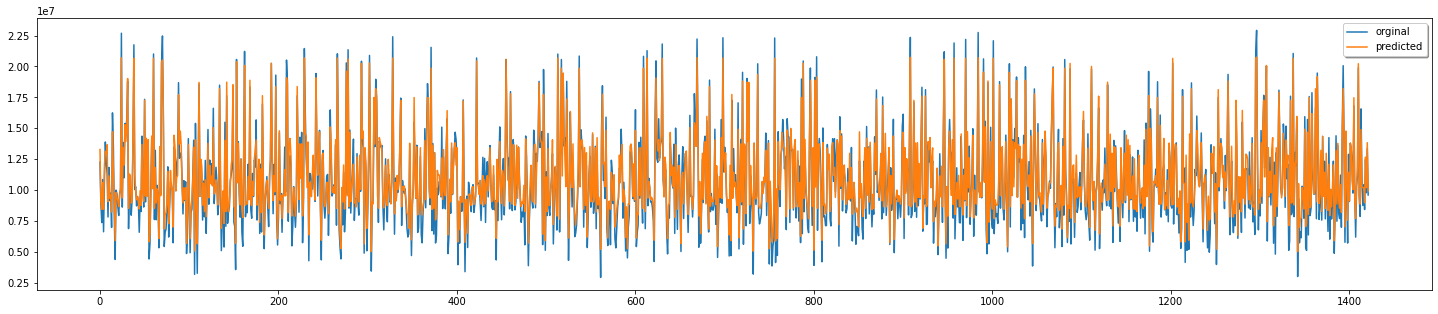

In [ ]:
## Ploting the randomforest
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,y_pred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

# **Feature Importance**

In [ ]:
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

AREA             47.998974
BUILDTYPE        33.222690
INT_SQFT         11.024926
MZZONE            3.685339
PARK_FACIL        1.500163
STREET            0.954099
N_ROOM            0.361166
AGE_OF_HOUSE      0.291009
N_BATHROOM        0.163413
SALE_COND         0.136756
N_BEDROOM         0.118486
DIST_MAINROAD     0.108048
QS_OVERALL        0.104399
QS_BATHROOM       0.100634
QS_ROOMS          0.100487
QS_BEDROOM        0.090225
UTILITY_AVAIL     0.039185
dtype: float64

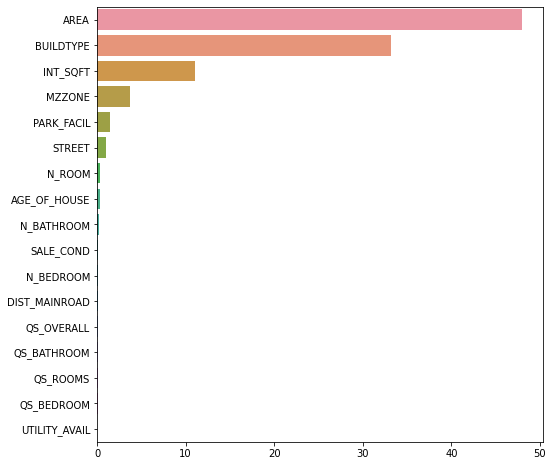

In [ ]:
#plotting the feature importance
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [ ]:
#filtering the important featres
main_features=feature_scores.loc[feature_scores >0.6]
main_features

AREA          47.998974
BUILDTYPE     33.222690
INT_SQFT      11.024926
MZZONE         3.685339
PARK_FACIL     1.500163
STREET         0.954099
dtype: float64

In [ ]:
x=dataset[main_features.index]

# **Training Best Model with Important Features**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2, random_state=20)

In [ ]:
RandomForest=RandomForestRegressor(max_depth=10,n_estimators=150,random_state=10)

In [ ]:
#fitting the model
RandomForest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=10)

In [ ]:
#predicting the target value
y_pred=RandomForest.predict(x_test)
y_pred

array([10356544.94020276,  5222225.66124425,  8833313.31372359, ...,
       18772037.08650457, 11501095.40074065,  9864478.42908187])

In [ ]:
#finding the score of the model
rf_score=RandomForest.score(x_test,y_test)
print(rf_score)
print('Random Forest Model score is :',rf_score*100,'%')

0.9857368030704543
Random Forest Model score is : 98.57368030704544 %


In [ ]:
#Predicting the Price Range for a new input
from babel.numbers import format_currency
value=RandomForest.predict([[1500,1,2,3,2,1]])
low=int(value-(value*0.02))
low=format_currency(low, 'INR', locale='en_IN')
high=int(value+(value*0.02))
high=format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹1,07,02,415.00 to ₹1,11,39,248.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

